# Практическая работа №2: Классические методы математической статистики
Выполнил студент гр. 1374 Пасечник Матвей. Вариант №17

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа;
сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

**Выборочный аналог математического ожидания - выборочное среднее:**
$$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$$

**Выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО:**
$$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$$

$$S=\sqrt{S^2}$$



**Выборочный коэффициент асимметрии:**
$$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3}$$

**Выборочный коэффициент эксцесса:**
$$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3$$

**Метод максимального правдоподобия** - это метод оценивания неизвестного параметра путём максимизации функции правдоподобия
 $$L(\overrightarrow{X},\theta)=\prod_{i=1}^{n}P_{\theta}(X_{i})$$

**Метод моментов** — метод оценки неизвестных параметров распределений, идея метода заключается в замене истинных соотношений выборочными аналогами.

**Статистика критерия Колмагорова:**
$$D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$$

**Теорема Колмагорова:**

$\sqrt{n}D_n \rightarrow K$, при основной гипотезе

**Наиболее мощный критерий:**

$$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > с \\
    p, LR(x) = с \\
    0, LR(x) < с \\
  \end{array}\right.$$




## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.a Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as sp
from scipy.stats import expon, kstwobign,gamma

import statistics as stat
import math
import collections

In [97]:
data = [0, 1, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 3, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]
n = len(data)
#вариационный ряд

def variation(data):
    data.sort()
    return data

print( "Вариационный ряд:", variation(data))

Вариационный ряд: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3]


Таким образом, вариационный ряд:
 $\vec{X}^\prime = \left(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,3,3,3 \right)$

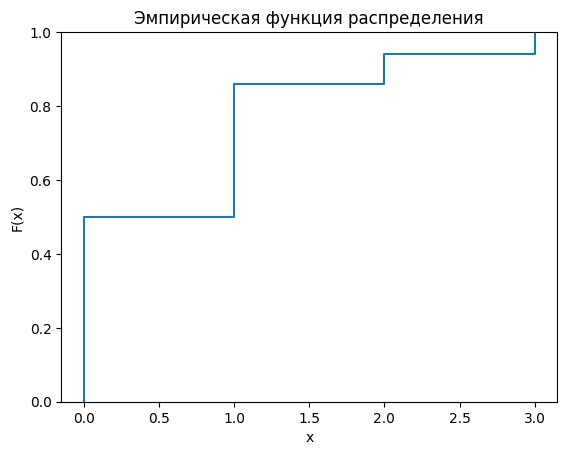

In [98]:
sns.ecdfplot(data) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

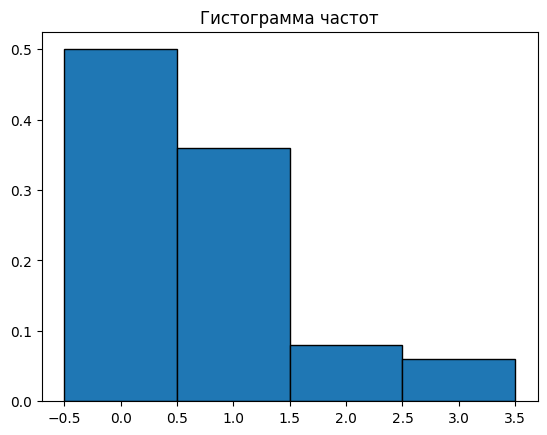

In [99]:
#гистограмма частот
hist = plt.hist(data, edgecolor='black', bins=4, weights=np.ones_like (data) / n, range=(min(data)-0.5, max(data)+0.5))
plt.title('Гистограмма частот');

### 1.b Вычислить выборочные аналоги следующих числовых характеристик:

In [100]:
#Выборочный математического ожидания
print('Выборочный математического ожидания', np.mean(data))


Выборочный математического ожидания 0.7


Получаем выборочный аналог математического ожидания - выборочное среднее:

$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 0,7$

In [101]:
#Выборочный аналог дисперсии и СКО
print("Выборочная дисперсия: ", np.var(data))
print("Выборочное СКО: ",  np.std(data))

Выборочная дисперсия:  0.73
Выборочное СКО:  0.8544003745317531


Получаем выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО:

$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=0.73$

$S=\sqrt{S^2}=0.8544003745317531$

In [102]:
#Выборочная медиана
print("Выборочная медиана: ",  np.median(data))

Выборочная медиана:  0.5


Выборочная медиана:

$np = 50\cdot\frac{1}{2}=25\in \mathbb{Z} \Rightarrow z_{50,\frac{1}{2}} =  \left[ X_{(25)},X_{(26)} \right) = \left[0,1\right) \Rightarrow z_{50,\frac{1}{2}} = 0.5$


In [103]:
#Выборочная асимметрия
print("Выборочная асимметрия: ", sp.skew(data))

Выборочная асимметрия:  1.1928577193687824


Выборочный коэффициент асимметрии:

$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 1.1928577193687826$

In [104]:
#Выборочный эксцесс
print("Выборочный эксцесс: ", sp.kurtosis(data))

Выборочный эксцесс:  0.810283355226121


Выборочный коэффициент эксцесса:

$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = 0.810283355226121$

In [105]:
def F(x): #эмпирическая функция распределения
    sum_i = 0
    for item in data:
        if item < x:
            sum_i += 1
    return sum_i/n

a, b = 0, 0.92
print("Вероятность Р(х = a) = " , F(a))
print("Вероятность Р(х = b) = " , F(b))
print("Вероятность: ", F(b) - F(a))

Вероятность Р(х = a) =  0.0
Вероятность Р(х = b) =  0.5
Вероятность:  0.5


Выборочный аналог $\mathbb{P}\left(x \in \left[a, b\right]\right)$, a = 0.00, b = 0.92:

$\mathbb{P}\left(x \in \left[a, b\right]\right) = \mathrm{F}(b) - \mathrm{F}(a) = 0.5 - 0 = 0.5$, где $\mathrm{F}(x)$ -- эмпирическая функция распределения

### 1.c В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

*Плотность распределения пуассона*:
$q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$

*Оценка максимального правдоподобия:*

$ L\left(\vec{X}, \theta \right) =\prod\limits_{i = 1}^nq_{\theta}\left(x_i\right)=\prod\limits_{i = 1}^n\frac{\lambda^x_i}{x_i!}e^{-\lambda} =  \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$

$LL\left(\vec{X}, \theta \right) = \sum \limits_{i=1}^{n}x_i \cdot \ln{\lambda} - n\lambda + \ln{\prod\limits_{i = 1}^n\frac{1}{\large x_i!}}$

$ \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} - n = 0 \Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ - ОМП

$ \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.

*Оценка методом моментов:*

$\mathbb{E}X_1 = \lambda$ - математическое ожидание (теоретическая величина)

$\mathrm{M_1} = \overline{X}$ - выборочное среднее (выборочная величина),
Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$

$\mathbb{E}_{\theta}\widetilde{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.

### 1.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.


$\alpha_1 = 0.05$

*Плотность распределения Пуассона*:

$ q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$

$\widehat{\theta} = \widehat{\lambda} = \overline{X}$

Из пункта 1.с:

$ \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} - n$

$\frac{\partial^2 LL}{\partial \lambda^2} =  - \frac{\sum \limits_{i=1}^{n}x_i}{\lambda^2}$

$\mathrm{I}_n(\lambda) = - \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \frac{n}{\lambda}$

$\mathrm{I}(\lambda) = \lim \limits_{n \to \infty} \frac{1}{\lambda} = \frac{1}{\lambda}$

*Квантили.*

Так как распределение симметричное:

$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.05}{2} = 0.975$, где $\alpha = \alpha_1 = 0.05$

$\mathrm{\Phi}(x_{\alpha}) = 0.975 \Rightarrow x_{\alpha} = 1.96 $ из таблицы значений функции Лапласа

*Асимптотический доверительный интервал:*

$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
$\left[0.47, 0.93\right] \ni \lambda$

In [106]:
x_alpha = 1.96
xMean = np.mean(data)

adi = []

left = xMean - x_alpha * ((xMean) / n)**0.5 #подсчёт левой границы АДИ
adi.append(left)

right = xMean + x_alpha * (xMean / n)**0.5 #подсчёт правой границы АДИ
adi.append(right)

print("Асимптотический доверительный интервал: ", adi)

Асимптотический доверительный интервал:  [0.468089672502495, 0.9319103274975049]


### 1.е Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 1.40$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.05$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.



Расммотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$

$\mathbb{P}_{1} = \frac{1.4^0}{0!}e^{-1.4} = 0.25$

$\mathbb{P}_{2} = \frac{1.4^1}{1!}e^{-1.4} = 0.35$

$\mathbb{P}_{3} = \frac{1.4^2}{2!}e^{-1.4} = 0.24$

$\mathbb{P}_{4} = \frac{1.4^3}{3!}e^{-1.4} = 0.11$

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{3, 0.05}^2 = 7.815$

Получили: $\chi^2 = 19.69$

Так как $\chi^2 > \chi_{3, 0.05}^2$, то гипотезу отвергаем

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу 0.05, исходя из значений таблицы $\chi^2$.

In [107]:
lambda_0 = 1.4
x_0, x_1, x_2, x_3 = 0, 1, 2, 3
exp_lambda = math.exp(-lambda_0)

n_1 = data.count(0)
n_2 = data.count(1)
n_3 = data.count(2)
n_4 = data.count(3)

#вычисление значений вероятностей
P1 = (lambda_0**x_0 / math.factorial(x_0)) * exp_lambda
P2 = (lambda_0**x_1 / math.factorial(x_1)) * exp_lambda
P3 = (lambda_0**x_2 / math.factorial(x_2)) * exp_lambda
P4 = (lambda_0**x_3 / math.factorial(x_3)) * exp_lambda

print(round(n*P1,2), round(n*P2,2), round(n*P3,2), round(n*P4,2))

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3)+ ((n_4 - n*P4)**2) / (n*P4)
print(round(chi, 2))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.05, df = 4-1))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.05, df = 4-1), 3))


12.33 17.26 12.08 5.64
19.69
x_alpha_1 равен: 7.814727903251179
p-value =  0.04999999999999993


### 1.f Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.05$. Вычислить наибольшее значение значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.


Проведём группировку, как в пункте 1.е. В качестев параметра $\lambda$ возьмём его ОМП, то есть $\lambda = \overline{X}$

$\mathbb{P}_{1} = \frac{\overline{X}^0}{0!}e^{-\overline{X}} = \frac{0.7^0}{0!}e^{-0.7} = 0.5$

$\mathbb{P}_{2} = \frac{\overline{X}^1}{1!}e^{-\overline{X}}= 0.35$

$\mathbb{P}_{3} = \frac{\overline{X}^2}{2!}e^{-\overline{X}} + \frac{\overline{X}^3}{3!}e^{-\overline{X}} = 0.15$

Получили: $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 1.66$

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{2, 0.05}^2 = 5.991$

Так как $\chi^2 < \chi_{2, 0.05}^2$ , то гипотезу принимаем

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.112, исходя из таблицы значений $\chi^2$.

In [108]:
exp_mn = math.exp(-xMean)

#вычисление значений вероятностей
P1 = ((xMean)**x_0 / math.factorial(x_0)) * exp_mn
P2 = (xMean**x_1 / math.factorial(x_1)) * exp_mn
P3 = (xMean**x_2 / math.factorial(x_2)) * exp_mn + ((xMean)**x_3 / math.factorial(x_3)) * exp_mn

print(round(n*P1,2), round(n*P2,2), round(n*P3,2))

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3)
print("Критерий значимости: ", round(chi, 2))
print("x_alpha_1 равен:", sp.chi2.ppf(1 - 0.05, df = 3-1))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.05, df = 3-1), 3))

24.83 17.38 7.5
Критерий значимости:  1.66
x_alpha_1 равен: 5.991464547107979
p-value =  0.11202623267236245


### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 1.40$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 0.60$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.05$. Что получится, если поменять местами основную и альтернативную гипотезы?



$ H_{0}:\lambda = \lambda_{0}$

$ H_{1}:\lambda = \lambda_{1}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \left(\frac{\lambda_{1}}{\lambda_{0}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot e^{-n\cdot \lambda_{1} + n\cdot \lambda_{0} }$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) > c\Leftrightarrow \overline{X}> c$

$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\sim N(0,1)$

$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$

$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.95$

$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{0}}{\sqrt{\overline{X}}} = 1.65\to c=1.595$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > 1.595 \\
    p, LR(x) = 1.595 \\
    0, LR(x) < 1.595 \\
  \end{array}\right.$

   $ c=1.595 > \overline{X} = 0.7 \to$ отвергаем гипотезу

*Меняем местами основную и альтернативную гипотезу:*

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot e^{-n\cdot \lambda_{0} + n\cdot \lambda_{1} }$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})\gt c\Leftrightarrow \overline{X}\gt c$

$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\sim N(0,1)$

$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$

$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.95$

$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{1}}{\sqrt{\overline{X}}} = 1.65\to c=0.795$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > 0.795 \\
    p, LR(x) = 0.795 \\
    0, LR(x) < 0.795 \\
  \end{array}\right.$

  $ c = 0.795 > \overline{X} = 0.7 \to $ отвергаем гипотезу

### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений:
$$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}}, k \in \mathbb{Z}_+$$



**1.h.c**

Преобразуем плотность:

$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}} = \frac{1}{\lambda + 1} \cdot \left(\frac{\lambda}{\lambda + 1}\right)^k = \frac{1}{\lambda + 1} \cdot \left(\frac{\lambda + 1 - 1}{\lambda + 1}\right)^k = \frac{1}{\lambda + 1} \cdot \left(1 - \frac{1}{\lambda + 1}\right)^k$

Пусть $\lambda + 1 = p$ , тогда $\mathbb{E}x = \frac{1-p}{p} = \lambda$

**Оценка максимального правдоподобия:**

$\mathrm{L}\left(\vec{X}, \theta \right) = \lambda^{\sum \limits_{i = 1}^n x_i} + (\lambda + 1)^{-\sum \limits_{i = 1}^n x_i - n}$

$\mathrm{LL}\left(\vec{X}, \theta \right) = \sum \limits_{i = 1}^n x_i \ln{\lambda} - \left(\sum \limits_{i = 1}^n x_i + n\right) \ln{(\lambda + 1)}$

$\frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i = 1}^n x_i}{\lambda} - e \frac{\sum \limits_{i = 1}^n x_i + n}{\lambda + 1}  = 0$, $\Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ - ОМП

$\mathbb{E}_{\theta}\widehat{\theta} = \frac{1}{n}\sum \limits_{i = 1}^n\mathbb{E}_{\theta}x_i = \frac{1}{n} \cdot n \cdot \lambda = \lambda$, $\Rightarrow$ несмещённая оценка

**Оценка методом моментов:**

$\mathbb{E}X_1 = \lambda$ - математическое ожидание (теоретическая величина)

$\mathrm{M_1} = \overline{X}$ - выборочное среднее (выборочная величина)

Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$ - ОММ

$ \mathbb{E}_{\theta}\widetilde{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot  n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.


**1.h.d**

 Из предыдущего пункта: $\widehat{\lambda} = \overline{X}$

 $ \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i = 1}^n x_i}{\lambda} - \frac{\sum \limits_{i = 1}^n x_i + n}{\lambda + 1}$

 $ \frac{\partial^2 LL}{\partial \lambda^2} = - \frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} + \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}$

 $\mathrm{I}_n(\lambda) = - \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta}\left(\frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} - \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}\right) =  \frac{n}{\lambda} - \frac{n(\lambda - 1)}{(\lambda + 1)^2}$

 $\mathrm{I}(\lambda) = \lim \limits_{n \to \infty}\left(\frac{1}{\lambda} - \frac{\lambda - 1}{(\lambda + 1)^2}\right) = \frac{3\lambda + 1}{\lambda(\lambda + 1)^2}$

 **Квантили.** Так как распределение симметричное:

$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.05}{2} = 0.975$, где $\alpha = \alpha_1 = 0.05$

$\mathrm{\Phi}(x_{\alpha}) = 0.975 \Rightarrow x_{\alpha} = 1.96$ из таблицы значений функции Лапласа.


*Асимптотический доверительный интервал:*

$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
$$\left[0.57,0.83\right] \ni \lambda$$


In [109]:
adi_2 = []

left_2 = xMean - x_alpha * (xMean / (n*(3*xMean+1)))**0.5 #подсчёт левой границы АДИ
adi_2.append(round(left_2, 2))

right_2 = xMean + x_alpha * (xMean / (n*(3*xMean+1)))**0.5 #подсчёт правой границы АДИ
adi_2.append(round(right_2, 2))

print("Асимптотический доверительный интервал: ", adi_2)

Асимптотический доверительный интервал:  [0.57, 0.83]


**1.h.e**


Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$, где $q_{\theta}(x)$ - плотность, данная по условию.

$\mathbb{P}_{1} = 0.42$

$\mathbb{P}_{2} = 0.24$

$\mathbb{P}_{3} = 0.14$

$\mathbb{P}_{4} = 0.08$

Получили: $\chi^2 = 4.99$

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{3, 0.05}^2 = 7.815$

Так как $\chi^2 < \chi_{3, 0.05}^2$ , то гипотезу принимаем.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу $\alpha = 0.05$, исходя из таблицы значений $\chi^2$.

In [134]:
#вычисление значений вероятностей
P1 = (lambda_0 ** x_0) / ((lambda_0 + 1)**(x_0 + 1))
P2 = (lambda_0 ** x_1) / ((lambda_0 + 1)**(x_1 + 1))
P3 = (lambda_0 ** x_2) / ((lambda_0 + 1)**(x_2 + 1))
P4 = (lambda_0 ** x_3) / ((lambda_0 + 1)**(x_3 + 1))

print(round(n*P1,2), round(n*P2,2), round(n*P3,2), round(n*P4,2))

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3)
print("Критерий значимости: ", round(chi, 2))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.05, df = 4-1), 3))

20.83 12.15 7.09 4.14
Критерий значимости:  23.42
p-value =  0.04999999999999993


**1.h.f**

Проведём группировку, как в пункте 1.h.е. В качестев параметра $\lambda$ возьмём его ОМП, то есть $\lambda = \overline{X}$:

$\mathbb{P}_{1} = 0.59$

$\mathbb{P}_{2} = 0.24$

$\mathbb{P}_{3} = 0.14$

Получили: $\chi^2 = \sum \limits_{i=1}^3 \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  = 4.84$

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{3, 0.05}^2 = 5.99$

Так как $\chi^2 < \chi_{3, 0.05}^2$ , то гипотезу принимаем.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.11, исходя из таблицы значений $\chi^2$.

In [133]:
#вычисление значений вероятностей
P1 = (xMean ** x_0) / ((xMean + 1)**(x_0 + 1))
P2 = (xMean ** x_1) / ((xMean + 1)**(x_1 + 1))
P3 = (xMean ** x_2) / ((xMean + 1)**(x_2 + 1)) + (xMean ** x_3) / ((xMean + 1)**(x_3 + 1))

print(round(n*P1,2), round(n*P2,2), round(n*P3,2))

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3)
print("Критерий значимости: ", round(chi, 2))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.05, df = 3-1), 3))

29.41 12.11 7.04
Критерий значимости:  31.54
p-value =  0.11202623267236245


### 2.а Построить вариационный ряд, эмпирическую функцию распределения и гистограмму и полигон частот.

In [112]:
data2 = [6.73, 1.50, 0.33, 6.59, 2.84, 0.14, 0.90, 0.03, 1.56, 1.28, 1.49, 2.02, 1.34, 0.59, 1.47, 1.54, 0.93, 10.18, 13.20, 4.41, 0.43, 1.13, 0.99, 2.85, 0.43,4.62, 7.49, 2.38, 1.97, 1.57, 7.59, 1.78, 2.36, 0.73, 4.29, 1.29, 0.52, 8.47, 0.19, 2.38, 8.89, 3.00, 0.28, 2.76, 0.44, 5.50, 7.14, 3.50, 0.49, 3.06]
n = len(data2)
#вариационный ряд

def variation(data2):
    data2.sort()
    return data2

print( "Вариационный ряд:", variation(data2))

Вариационный ряд: [0.03, 0.14, 0.19, 0.28, 0.33, 0.43, 0.43, 0.44, 0.49, 0.52, 0.59, 0.73, 0.9, 0.93, 0.99, 1.13, 1.28, 1.29, 1.34, 1.47, 1.49, 1.5, 1.54, 1.56, 1.57, 1.78, 1.97, 2.02, 2.36, 2.38, 2.38, 2.76, 2.84, 2.85, 3.0, 3.06, 3.5, 4.29, 4.41, 4.62, 5.5, 6.59, 6.73, 7.14, 7.49, 7.59, 8.47, 8.89, 10.18, 13.2]


Таким образом, вариационный ряд:
 $$\vec{X}^\prime = \left(0.03, 0.14, 0.19, 0.28, 0.33, 0.43, 0.43, 0.44, 0.49, 0.52, 0.59, 0.73, 0.9, 0.93, 0.99, 1.13, 1.28, 1.29, 1.34, 1.47, 1.49, 1.5, 1.54, 1.56, 1.57, 1.78, 1.97, 2.02, 2.36, 2.38, 2.38, 2.76, 2.84, 2.85, 3.0, 3.06, 3.5, 4.29, 4.41, 4.62, 5.5, 6.59, 6.73, 7.14, 7.49, 7.59, 8.47, 8.89, 10.18, 13.2 \right)$$

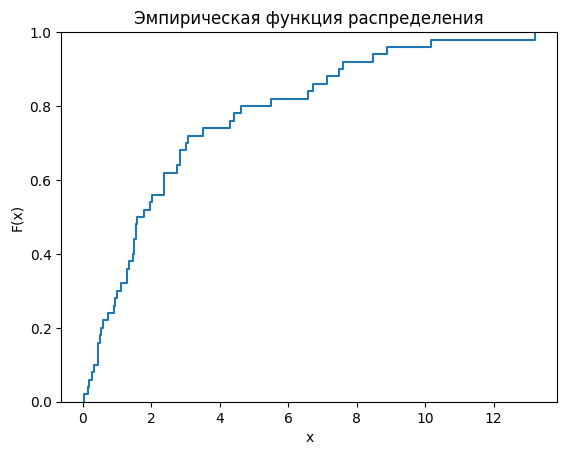

In [113]:
sns.ecdfplot(data2) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

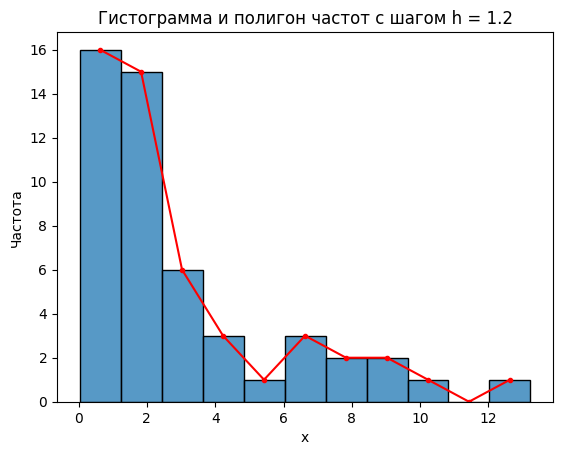

In [114]:
#гистограмма частот

sns.histplot(x=data2,binwidth=1.2)
bins = np.arange(min(data2), max(data2) + 1.2, 1.2)

hist, _ = np.histogram(data2, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, hist,'-r', marker='.')

plt.title("Гистограмма и полигон частот с шагом h = 1.2")
plt.xlabel("x")
plt.ylabel("Частота");

### 2.b Вычислить выборочные аналоги следующих числовых характеристик:

In [115]:
#Выборочный математического ожидания
print('Выборочный математического ожидания', np.mean(data2))

Выборочный математического ожидания 2.9518


Получаем выборочный аналог математического ожидания -- выборочное среднее:

$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i = 2.9518$

In [116]:
#Выборочный аналог дисперсии и СКО
print("Выборочная дисперсия: ", round(np.var(data2),2))
print("Выборочное СКО: ",  round(np.std(data2),2))

Выборочная дисперсия:  8.87
Выборочное СКО:  2.98


Получаем выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО:

$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=8.87$

$S=\sqrt{S^2}=2.98$

In [117]:
#Выборочная медиана
print("Выборочная медиана: ",  np.median(data2))

Выборочная медиана:  1.675


Выборочная медиана:

$np = 50\cdot\frac{1}{2}=25\in \mathbb{Z} \Rightarrow z_{50,\frac{1}{2}} =  \left[ X_{(25)},X_{(26)} \right) = \left[1.57,1.78\right) \Rightarrow z_{50,\frac{1}{2}} = 1.675$

In [118]:
#Выборочная асимметрия
print("Выборочная асимметрия: ", round(sp.skew(data2),2))

Выборочная асимметрия:  1.48


Выборочный коэффициент асимметрии:

$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 1.48$


In [119]:
#Выборочный эксцесс
print("Выборочный эксцесс: ", sp.kurtosis(data2))

Выборочный эксцесс:  1.6315365643118138


Выборочный коэффициент эксцесса:

$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = 1.6315365643118138$

In [120]:
#эмпирическая функция распределения
def F(x):
    sum_i = 0
    for i in data2:
        if i < x:
            sum_i += 1
    return sum_i/len(data2)

c = 2.40
d = 4.80

print("Вероятность Р(х = c) = " , F(c))
print("Вероятность Р(х = d) = " , F(d))
print("Вероятность: ", round(F(d) - F(c),2))

Вероятность Р(х = c) =  0.62
Вероятность Р(х = d) =  0.8
Вероятность:  0.18


Выборочный аналог $\mathbb{P}\left(x \in \left[c, d\right]\right)$, c = 2.40, b = 4.80:

$\mathbb{P}\left(x \in \left[c, d\right]\right) = \mathrm{F}(d) - \mathrm{F}(c) = 0.8 - 0.62 = 0.18$, где $\mathrm{F}(x)$ -- эмпирическая функция распределения

### 2.c В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить оценку максимального правдоподобия параметра

*Плотность показательного распределения*:
$q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$

*Оценка максимального правдоподобия:*

$ L\left(\vec{X}, \theta \right) =\prod\limits_{i = 1}^n q_{\theta}\left( x_i\right)=\prod\limits_{i = 1}^n \lambda \cdot e^{-\lambda \cdot x_i}  =  \lambda^{n} \cdot e^{-\lambda \cdot \sum \limits_{i=1}^{n}x_i} $

$LL\left(\vec{X}, \theta \right) = n \cdot \ln{\lambda} - \lambda \cdot \sum \limits_{i=1}^{n}x_i $

$ \frac{\partial LL}{\partial \lambda} = \frac{n}{\lambda} - \sum \limits_{i=1}^{n}x_i = 0 \Rightarrow \widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}}$ - ОМП

$ \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta} n\cdot \sum \limits_{i=1}^{n}\frac{1}{x_i} =  n \cdot\frac{1}{n-1}   \cdot \lambda = \frac{n\cdot\lambda}{n+1} \Rightarrow$ смещённая оценка.

МДС:

$T=\sum_{i=1}^{n}X_{i}$.

т.к. $q_{\theta}$ из сем-ва экспоненциальных распределений $\Rightarrow$ МДС =  ПДС.
$\mathbb{E}\widetilde{\theta} = \mathbb{E} \widehat{\theta} \cdot \frac{n-1}{n} = \frac{n\cdot\lambda}{n+1}\cdot \frac{n-1}{n} = \lambda$

$ \widetilde{\theta} = \widehat{\theta} \cdot \frac{n-1}{n} - несмещенная \, оценка$

*Оценка методом моментов:*

$\mathbb{E}X = \frac{1}{\lambda}$ - математическое ожидание (теоретическая величина)

$\mathrm{M} = \overline{X}$ - выборочное среднее (выборочная величина)

Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \frac{1}{\overline{X}}$

### 2.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

 $\alpha_2 = 0.20$

*Плотность показательного распределения:*:

$ q_{\theta} = \lambda \cdot e^{-\lambda\cdot x}$

$\widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}}$

Из пункта 2.с:

$ \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} - n$

$\frac{\partial^2 LL}{\partial \lambda^2} = -\frac{n}{\lambda^2}$

$\mathrm{I}_n(\lambda) = - \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta} \left(\frac{n}{\lambda^2}\right) = \frac{n}{\lambda^2}$

$\mathrm{I}(\lambda) = \lim \limits_{n \to \infty} \large \frac{1}{\lambda^2} = \frac{1}{\lambda^2}$

**Квантили:**

Так как распределение симметричное:
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.2}{2} = 0.9$, где $\alpha = \alpha_2 = 0.2$
$\mathrm{\Phi}(x_{\alpha}) = 0.9 \Rightarrow x_{\alpha} = 1.28
$

*Асимптотический доверительный интервал:*
$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:

$$\left[2.64, 3.26\right] \ni \lambda$$

In [121]:
x_alpha_2 = 1.28
xMean2 = np.mean(data2)
adi = []

left_2 = xMean2 - x_alpha_2*(xMean2 / (n))**0.5 #подсчёт левой границы АДИ
adi.append(round(left_2, 2))

right_2 = xMean2 + x_alpha_2 * (xMean2 / (n))**0.5 #подсчёт правой границы АДИ
adi.append(round(right_2, 2))

print("Асимптотический доверительный интервал: ", adi)

Асимптотический доверительный интервал:  [2.64, 3.26]


### 2.e C использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметром $λ_{0}=0.25$. Проверить гипотезу на уровне значимости $\alpha_2 = 0,2$. Вычислить наименьшее значения уровня значимости, на котором ещё нет оснований отвергнуть гипотезу.

Статистика критерия Колмагорова: $D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$

Теорема Колмагорова: $\sqrt{n}D_n \rightarrow K, при \, основной \, гипотезе$

$D_n = 49.037 $

$Критическое значение: C =  0.173$

Т.к. $D_n > c $ , то гипотезу отвергаем.

In [122]:
lambda0 = 0.25

D = np.max(np.abs(expon.cdf(data2, scale=1/lambda0) - np.arange(1, n+1 / n)))
critical_value = kstwobign.ppf(1 - 0.2/2) / np.sqrt(n)

print(D, critical_value)

49.03688316740124 0.17307822563424255


### 2.f Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 0.25$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.


Расммотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$


Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{3, 0.2}^2 = 4.64$

Получили: $\chi^2 = 29.58$

Так как $\chi^2 > \chi_{3, 0.2}^2$ , то гипотезу отвергаем

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.2, исходя из таблицы значений $\chi^2$.

In [123]:
intervals = [[0.03, 0.43], [0.44,1.28], [1.29, 3], [3.05, 13.2]]

def n_counter(start:float, end:float):
    counter = 0
    for i in data2:
        if i >=start and i <=end:
            counter += 1
    return counter

n_1 = n_counter(intervals[0][0],intervals[0][1])
n_2 = n_counter(intervals[1][0],intervals[1][1])
n_3 = n_counter(intervals[2][0],intervals[2][1])
n_4 = n_counter(intervals[3][0],intervals[3][1])

#вычисление значений вероятностей
P1 = lambda_0*math.exp(-lambda_0*intervals[0][0]) + lambda_0*math.exp(-lambda_0*intervals[0][1])
P2 = lambda_0*math.exp(-lambda_0*intervals[1][0]) + lambda_0*math.exp(-lambda_0*intervals[1][1])
P3 = lambda_0*math.exp(-lambda_0*intervals[2][0]) + lambda_0*math.exp(-lambda_0*intervals[2][1])
P4 = lambda_0*math.exp(-lambda_0*intervals[3][0]) + lambda_0*math.exp(-lambda_0*intervals[3][1])

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3) + ((n_4 - n*P4)**2) / (n*P4)

print("Критерий значимости: ", round(chi, 2))
print(round(n*P1,2), round(n*P2,2), round(n*P3,2),round(n*P4,2))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.2, df = 4-1), 3))

Критерий значимости:  326.65
105.46 49.47 12.55 0.98
p-value =  0.20000000000000007


### 2.g Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.


Расммотрим:

$\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$

$\widehat{\lambda} = \frac{1}{\overline{X}} = \frac{1}{2.9518} = 0.339 $

Из таблицы: $\chi_{k-1-1, \alpha_1}^2 = \chi_{2, 0.2}^2 = 3.22$

Получty: $\chi^2 =  38.25$

Так как $\chi^2 > \chi_{4, 0.1}^2$ , то гипотезу отвергаем

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.2, исходя из таблицы значений $\chi^2$.

In [124]:
omp = 1/xMean2

n_1 = n_counter(intervals[0][0],intervals[0][1])
n_2 = n_counter(intervals[1][0],intervals[1][1])
n_3 = n_counter(intervals[2][0],intervals[2][1])
n_4 = n_counter(intervals[3][0],intervals[3][1])

#вычисление значений вероятностей
P1 = lambda_0*math.exp(-omp*intervals[0][0]) + omp*math.exp(-omp*intervals[0][1])
P2 = lambda_0*math.exp(-omp*intervals[1][0]) + omp*math.exp(-omp*intervals[1][1])
P3 = lambda_0*math.exp(-omp*intervals[2][0]) + omp*math.exp(-omp*intervals[2][1])
P4 = lambda_0*math.exp(-omp*intervals[3][0]) + omp*math.exp(-omp*intervals[3][1])

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3) + ((n_4 - n*P4)**2) / (n*P4)

print("Критерий значимости: ", round(chi, 2))
print(round(n*P1,2), round(n*P2,2), round(n*P3,2),round(n*P4,2))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.2, df = 4-1-1), 3-1))

Критерий значимости:  148.93
83.93 71.29 51.35 25.1
p-value =  0.19999999999999996


### 2.h Построить наиболее мощный критерий проверки простой гипотезы показательности с параметром $\lambda_0 = 0.25$ при альтернативе показательности с параметром $\lambda_1 = 0.33$.  Проверить гипотезу на уровне значимости $\alpha_2 = 0.2$. Что получится, если поменять местами  основную и альтернативную гипотезы?

$ H_ {0} :  \lambda  =  \lambda _ {0} $

$ H_ {1} :  \lambda  =  \lambda _ {1} $

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n \cdot e^{-\lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})<  c\Leftrightarrow \overline{X} > c^*$

$e^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{1} + \lambda_{0})}=\left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n c$

Логарифмируем:

(1)    $c* = {\sum_{i=1}^{50}X_{i}}=n \cdot ln\left(\left(\frac{\lambda_{0}}{\lambda_{1}}\right) c\right)$

$\sum_{i=1}^{50}X_{i}\sim \Gamma \left(n,\frac{1}{\lambda}\right)$

$1-\Phi_{\Gamma \left(n,\frac{1}{\lambda}\right)}(c)=\alpha_{2}$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 236.996$

Найдем с* подставив значени в выражение (1):

$ с* = 259.521$

$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1})  = 972.684$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > 236.996 \\
    p, LR(x) = 236.996 \\
    0, LR(x) < 236.996 \\
\end{array}\right.$

$c < LR  \to$ принимаем гипотезу

In [125]:
lambda_1 = 0.33
c1 = sp.gamma.ppf(0.9, a =50, scale = 1/lambda_0)
print('c =', c1)
cSt1 = 50*np.log(lambda_0/lambda_1*c1)
print('c* = ',cSt1)
LR1 = ((lambda_0/lambda_1)**50)*np.exp(lambda_1*cSt1 - lambda_0*cSt1)
print('LR =', LR1,'\n')

c = 42.3207156468079
c* =  259.5205779459348
LR = 6.064081113304008e-90 



*Меняем местами основную и альтернативную гипотезу:*

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n \cdot exp^{-\lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})<  c\Leftrightarrow \overline{X} > c^*$

${exp}^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{0} + \lambda_{1})}=\left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n c$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 179.542$

$ с* = 282.12$


$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1}) = 0.00312$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > 179.542 \\
    p, LR(x) = 179.542 \\
    0, LR(x) < 179.542 \\
  \end{array}\right.$

$ c > LR \to $ отвергаем гипотезу

In [126]:
c2 = sp.gamma.ppf(0.9, a =50, scale=1/lambda_1)
print('c =', c2)
cSt2 = 50*np.log(lambda_0/lambda_1*c2)
print('c* = ',cSt2)
LR2 = ((lambda_1/lambda_0)**50)*np.exp(lambda_0*cSt2 - lambda_1*cSt2)
print('LR =', LR2)

c = 179.5424300167608
c* =  331.777321003076
LR = 6.2314501269642325e+122


### 2.i В пунктах (c)-(h) заменить семейство показательных распределений на семейство гамма-распределений с плотностями $$p_{\lambda} = \frac{\sqrt{\lambda}\cdot exp\left( \frac{-\lambda\cdot x}{2} \right)}{\sqrt{2\cdot \pi\cdot x}}$$

**2.i.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.**

$\alpha_2 = 0.20$

$\widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}}$

Из пункта 2.с:

$\frac{\partial LL}{\partial \lambda} = \frac{n}{2\lambda}-\frac{\sum_{i=1}^{n}X_{i}}{2}$

$\frac{\partial^2 LL}{\partial \lambda^2} = -\frac{n}{2 \cdot \lambda^2}$

$\mathrm{I}_n(\lambda) = - \large \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta} \left(\frac{n}{2 \cdot \lambda^2}\right) = \frac{n}{2\cdot\lambda^2}$

**Квантили:**

$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.2}{2} = 0.9$, где $\alpha = \alpha_2 = 0.2$
$\mathrm{\Phi}(x_{\alpha}) = 0.9 \Rightarrow x_{\alpha} = 1.28
$

*Асимптотический доверительный интервал:*
$\left[\frac{1}{\overline{X}} - \frac{x_{\alpha}}{\sqrt{n\cdot \frac{n}{2\cdot\lambda^2}}} , \frac{1}{\overline{X}} + \frac{x_{\alpha}}{\sqrt{n\cdot \frac{n}{2\cdot\lambda^2}}} \right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:

$$\left[0.277, 0.401\right] \ni \lambda$$

In [127]:
adi_2 = []

left_2 = 1/xMean2 - x_alpha_2 *xMean2/(n * n / 2 * xMean2)**0.5 #подсчёт левой границы АДИ
adi_2.append(round(left_2, 3))

right_2 = 1/xMean2+ x_alpha_2 * xMean2/(n * n / 2 *xMean2)**0.5 #подсчёт правой границы АДИ
adi_2.append(round(right_2, 3))

print("Асимптотический доверительный интервал: ", adi_2)


Асимптотический доверительный интервал:  [0.277, 0.401]


**2.i.e C использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметром λ0=0.25. Проверить гипотезу на уровне значимости α2 = 0,2. Вычислить наименьшее значения уровня значимости, на котором ещё нет оснований отвергнуть гипотезу.**

Статистика критерия Колмагорова: $D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$

Теорема Колмагорова: $\sqrt{n}D_n \rightarrow K, при \, основной \, гипотезе$

$D_n = 49.037 $

Критическое  значение: $C =  0.173$

Т.к. $D_n > c $, то гипотезу отвергаем


In [128]:
D = np.max(np.abs(gamma.cdf(data2,1, scale=1/lambda_0) - np.arange(1, n+1 / n)))
critical_value = kstwobign.ppf(1 - 0.2/2) / np.sqrt(n)

print(D, critical_value)

49.000000009424056 0.17307822563424255


**2.i.f Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 0.25$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

Расммотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$


Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{4, 0.1}^2 = 4.64$

Получили: $\chi^2 = 93.82$

**Так как** $\chi^2 > \chi_{4, 0.1}^2$ **, то гипотезу отвергаем**

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, очень мало $(\ll 0.01)$

In [129]:
#вычисление значений вероятностей
P1 = math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[0][0]/2)/math.sqrt(2* math.pi * intervals[0][0]) + math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[0][1]/2)/math.sqrt(2* math.pi * intervals[0][1])
P2 = math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[1][0]/2)/math.sqrt(2* math.pi * intervals[1][0]) + math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[1][1]/2)/math.sqrt(2* math.pi * intervals[1][1])
P3 = math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[2][0]/2)/math.sqrt(2* math.pi * intervals[2][0]) + math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[2][1]/2)/math.sqrt(2* math.pi * intervals[2][1])
P4 = math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[3][0]/2)/math.sqrt(2* math.pi * intervals[3][0]) + math.sqrt(lambda_0)*math.exp(-lambda_0*intervals[3][1]/2)/math.sqrt(2* math.pi * intervals[3][1])

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3) + ((n_4 - n*P4)**2) / (n*P4)
print("Критерий значимости: ", round(chi, 2))
print(round(n*P1,2), round(n*P2,2), round(n*P3,2),round(n*P4,2))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.2, df = 4-1), 3))

Критерий значимости:  282.47
160.07 34.66 10.09 1.6
p-value =  0.20000000000000007


**2.i.g Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

Расммотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$

$\widehat{\lambda} = \frac{1}{\overline{X}} = \frac{1}{2.9518} = 0.339 $

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{3, 0.2}^2 =  4.64$

$\chi^2 = 98.18$

**Так как** $\chi^2 > \chi_{3, 0.2}^2$ **, то гипотезу отвергаем**

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, очень мало $(\ll 0.01)$

In [130]:
intervals = [[0.03, 0.43], [0.44,1.28], [1.29, 2.85], [3, 13.2]]

def n_counter(start:float, end:float):
    counter = 0
    for i in data2:
        if i >=start and i <=end:
            counter += 1
    return counter


n_1 = n_counter(intervals[0][0],intervals[0][1])
n_2 = n_counter(intervals[1][0],intervals[1][1])
n_3 = n_counter(intervals[2][0],intervals[2][1])
n_4 = n_counter(intervals[3][0],intervals[3][1])

#вычисление значений вероятностей
P1 = math.sqrt(omp)*math.exp(-omp*intervals[0][0]/2)/math.sqrt(2* math.pi * intervals[0][0])
+ math.sqrt(omp)*math.exp(-omp*intervals[0][1]/2)/math.sqrt(2* math.pi * intervals[0][1])
P2 = math.sqrt(omp)*math.exp(-omp*intervals[1][0]/2)/math.sqrt(2* math.pi * intervals[1][0])
+ math.sqrt(omp)*math.exp(-omp*intervals[1][1]/2)/math.sqrt(2* math.pi * intervals[1][1])
P3 = math.sqrt(omp)*math.exp(-omp*intervals[2][0]/2)/math.sqrt(2* math.pi * intervals[2][0])
+ math.sqrt(omp)*math.exp(-omp*intervals[2][1]/2)/math.sqrt(2* math.pi * intervals[2][1])
P4 = math.sqrt(omp)*math.exp(-omp*intervals[3][0]/2)/math.sqrt(2* math.pi * intervals[3][0])
+ math.sqrt(omp)*math.exp(-omp*intervals[3][1]/2)/math.sqrt(2* math.pi * intervals[3][1])

#вычисление критерия хи квадрат
chi = ((n_1 - n*P1)**2) / (n*P1) + ((n_2 - n*P2)**2) / (n*P2) + ((n_3 - n*P3)**2) / (n*P3) + ((n_4 - n*P4)**2) / (n*P4)
print("Критерий значимости: ", round(chi, 2))
print(round(n*P1,2), round(n*P2,2), round(n*P3,2),round(n*P4,2))
print('p-value = ', 1 - sp.chi2.cdf(sp.chi2.ppf(1 - 0.2, df = 4-1), 3))


Критерий значимости:  100.74
66.69 16.25 8.22 4.03
p-value =  0.20000000000000007


**2.h Построить наиболее мощный критерий проверки простой гипотезы гамма-распределенности с параметром $\lambda_0 = 0.25$ при альтернативе амма-распределенности с параметром $\lambda_1 = 0.33$.  Проверить гипотезу на уровне значимости $\alpha_2 = 0.2$. Что получится, если поменять местами  основную и альтернативную гипотезы?**

$ H_ {0} :  \lambda  =  \lambda _ {0}$

$ H_ {1} :  \lambda  =  \lambda _ {1}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = =\left(\frac{\lambda_{0}}{\lambda_{1}}\right)^{\frac{n}{2}}\cdot e^ \left((\lambda_{1}-\lambda_{0})\cdot \sum_{i=1}^{50}X_{i} \right)$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})<  c\Leftrightarrow \overline{X} > c^*$

$e^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{1} + \lambda_{0})}=\left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n c$

Логарифмируем:

(1) $c* = {\sum_{i=1}^{50}X_{i}}=n \cdot ln\left(\left(\frac{\lambda_{0}}{\lambda_{1}}\right) c\right)$

$\sum_{i=1}^{50}X_{i}\sim \Gamma \left(n,\frac{1}{\lambda}\right)$

$1-\Phi_{\Gamma \left(n,\frac{1}{\lambda}\right)}(c)=\alpha_{2}$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 236.996$

Найдем с* подставив значени в выражение (1):

$ с* = 259.52$

$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1}) = 1005356.56$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > 236.996 \\
    p, LR(x) = 236.996\\
    0, LR(x) < 236.996\\
  \end{array}\right.$

  $c < LR  \to$ принимаем гипотезу

In [131]:
c1 = sp.gamma.ppf(0.9, a =50, scale = 1/lambda_0)
print('c =', c1)
cSt1 = 50*np.log(lambda_0/lambda_1*c1)
print('c* = ',cSt1)
LR1 = ((lambda_0/lambda_1)**25)*np.exp(lambda_1*cSt1 - lambda_0*cSt1)
print('LR =', LR1,'\n')

c = 42.3207156468079
c* =  259.5205779459348
LR = 1.2371222184023656e-105 



**Меняем местами основную и альтернативную гипотезу:**

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n \cdot e^{-\lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})<  c\Leftrightarrow \overline{X} > c^*$

$e^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{0} + \lambda_{1})}=\left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n c$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 179.54$

$ с* = 259.52$


$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1})  = 0.00000302$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > 179.54 \\
    p, LR(x) = 179.54\\
    0, LR(x) < 179.54\\
  \end{array}\right.$

  $ c > LR \to$ принимаем гипотезу

In [132]:
c2 = sp.gamma.ppf(0.9, a =50, scale=1/lambda_1)
print('c =', c2)
cSt2 = 50*np.log(lambda_0/lambda_1*c2)
print('c* = ',cSt2)
LR2 = ((lambda_1/lambda_0)**25)*np.exp(lambda_0*cSt2 - lambda_1*cSt2)
print('LR =', LR2)

c = 179.5424300167608
c* =  331.777321003076
LR = 3.0545097696345245e+138


## Выводы
В процессе выполнения практической работы были изучены и применены методы математической статистики для анализа данных, приобретены навыки использования программных пакетов для реализации этих методов. Были изучены основные методы статистического анализа, приобретены навыки проведения статистических тестов, анализа выборочных данных, построения доверительных интервалов и проверки гипотез. Кроме того, были построены оценки, асимптотические интервалы и проверены гипотезы.